In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import random

In [2]:
def grid(file_name):
    #read rows and columns
    with open(file_name, "r") as f:
        content = f.readline()

    lines = [line.split(" ") for line in content.split("\n")]
    lst = []
    
    for line in lines:
        lst += line
    num = (len(lst[0]))
    row = int(lst[0])
    column = int(lst[1])
    return row,column,num
    
def read_image(file_name,num): 
    
    image_file = open(file_name,"r")
    x = []
    for line in image_file:
        for x_i in line.strip():
            x.append(x_i)
    del (x[0:2*num+1])
    return x

def print_image(x,column):
    results = x
    for i in range(len(results)):
        print(results[i], end='')
        if (i+1) % column == 0:
            print(' ')

In [3]:
#三种点
#一，(1,1)-(1,column-2)
#    (row-2,1)-(row-2,column-2)
def nine(array,x_coordinate,y_coordinate,b):
    #计算单个犯人该次的得分
    #array就是当时的数组，x，y是坐标，b是举报人会得到的分数
    prisoner = array[x_coordinate][y_coordinate]
    score = np.zeros(8,dtype = '<U2')
    #这里数据结构我想不到，赶时间就这么写了
    score[0] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate-1])
    score[1] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate])
    score[2] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate+1])
    score[3] = np.char.add(prisoner,array[x_coordinate][y_coordinate-1])
    score[4] = np.char.add(prisoner,array[x_coordinate][y_coordinate+1])
    score[5] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate-1])
    score[6] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate])
    score[7] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate+1])
    if prisoner == 'C':
        return np.sum(score == 'CC')#只有CC得一分
    elif prisoner == 'D':
        return float(b)*float(np.sum(score == 'DC'))#只有DC得b分
    
#(0,1)-(0,column-2),(row-1,1)-(row-1,column-2),(1,0)-(row-2,0),(1,column-1)-(row-2,column-1)
def five(array,x_coordinate,y_coordinate,b):
    prisoner = array[x_coordinate][y_coordinate]
    score = np.zeros(5,dtype = '<U2')
    if x_coordinate == 0:
        score[0] = np.char.add(prisoner,array[x_coordinate][y_coordinate-1])
        score[1] = np.char.add(prisoner,array[x_coordinate][y_coordinate+1])
        score[2] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate-1])
        score[3] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate])
        score[4] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate+1])
    elif x_coordinate == row-1:
        score[0] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate-1])
        score[1] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate])
        score[2] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate+1])
        score[3] = np.char.add(prisoner,array[x_coordinate][y_coordinate-1])
        score[4] = np.char.add(prisoner,array[x_coordinate][y_coordinate+1])
    elif y_coordinate == 0:
        score[0] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate])
        score[1] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate+1])
        score[2] = np.char.add(prisoner,array[x_coordinate][y_coordinate+1])
        score[3] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate])
        score[4] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate+1])
    elif y_coordinate == column-1:
        score[0] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate-1])
        score[1] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate])
        score[2] = np.char.add(prisoner,array[x_coordinate][y_coordinate-1])
        score[3] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate-1])
        score[4] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate])
    if prisoner == 'C':
        return np.sum(score == 'CC')#只有CC得一分
    elif prisoner == 'D':
        return float(b)*float(np.sum(score == 'DC'))#只有DC得b分
#(0,0),(0,column-1),(row-1,0),(row-1,column-1)
def three(array,x_coordinate,y_coordinate,b):
    prisoner = array[x_coordinate][y_coordinate]
    score = np.zeros(3,dtype = '<U2')
    if x_coordinate == 0 and y_coordinate == 0:
        score[0] = np.char.add(prisoner,array[x_coordinate][y_coordinate+1])
        score[1] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate])
        score[2] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate+1])
    elif x_coordinate == row-1 and y_coordinate ==0:
        score[0] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate])
        score[1] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate+1])
        score[2] = np.char.add(prisoner,array[x_coordinate][y_coordinate+1])
    elif x_coordinate == 0 and y_coordinate == column-1:
        score[0] = np.char.add(prisoner,array[x_coordinate][y_coordinate-1])
        score[1] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate-1])
        score[2] = np.char.add(prisoner,array[x_coordinate+1][y_coordinate])
        
    elif x_coordinate == row-1 and y_coordinate == column-1:
        score[0] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate-1])
        score[1] = np.char.add(prisoner,array[x_coordinate-1][y_coordinate])
        score[2] = np.char.add(prisoner,array[x_coordinate][y_coordinate-1])  
    if prisoner == 'C':
        return np.sum(score == 'CC')#只有CC得一分
    elif prisoner == 'D':
        return float(b)*float(np.sum(score == 'DC'))#只有DC得b分

def countScore(array,x_coordinate,y_coordinate,b):
    if x_coordinate>=1 and x_coordinate<=row-2 and y_coordinate>=1 and y_coordinate<=column-2:
        s = nine(array,x_coordinate,y_coordinate,b)
        return s 
    elif (x_coordinate==0 and y_coordinate==0) or (x_coordinate==row-1 and y_coordinate==0) or(x_coordinate==0 and y_coordinate==column-1)or(x_coordinate==row-1 and y_coordinate==column-1):
        s = three(array,x_coordinate,y_coordinate,b)
        return s
    else:
        s = five(array,x_coordinate,y_coordinate,b)
        return s

In [4]:
def generate_sboard(array,b):
    score_board = np.zeros((row,column),dtype = float)
    for i in range(0,row):
        for k in range(0,column):
            score_board[i][k] = countScore(array,i,k,b)
    return score_board

In [22]:
#三种点
#一，(1,1)-(1,column-2)
#    (row-2,1)-(row-2,column-2)
def nine_update(array_current,score_board,x_coordinate,y_coordinate):
    #这里数据结构我想不到，赶时间就这么写了,用方向来命名
    a = score_board[x_coordinate-1][y_coordinate-1]
    b = score_board[x_coordinate-1][y_coordinate]
    c = score_board[x_coordinate-1][y_coordinate+1]
    d = score_board[x_coordinate][y_coordinate-1]
    e = score_board[x_coordinate][y_coordinate]
    f = score_board[x_coordinate][y_coordinate+1]
    g = score_board[x_coordinate+1][y_coordinate-1]
    h = score_board[x_coordinate+1][y_coordinate]
    i = score_board[x_coordinate+1][y_coordinate+1]
    lst = [a,b,c,d,e,f,g,h,i]
    
    new_state = []
    #new_state里是得分最多的犯人在九宫格里的序号（可能不止一个）
    for i in range(len(lst)):
        if lst[i]==max(lst):
            new_state.append(i)
    state = new_state.copy()
    table = {0:(-1,-1),1:(-1,0),2:(-1,1),3:(0,-1),4:(0,0),5:(0,1),6:(1,-1),7:(1,0),8:(1,1)}
    #table表示序号0的犯人对应坐标（x-1，y-1），依次类推
    for i in range(len(new_state)):
        state[i]=array_current[x_coordinate+table[new_state[i]][0]][y_coordinate+table[new_state[i]][1]]
    #state里是九宫格里所有获得分数最多的犯人（因为可能并列第一）
    #print(state)
    if 'D' not in state:
        #array_new[x_coordinate][y_coordinate] = 'C'
        return 'C'
    else:
        #array_new[x_coordinate][y_coordinate] = 'D'
        return 'D'
        
    #(0,1)-(0,column-2),(row-1,1)-(row-1,column-2),(1,0)-(row-2,0),(1,column-1)-(row-2,column-1)
def five_update(array_current,score_board,x_coordinate,y_coordinate):
    if x_coordinate == 0:
        a = score_board[x_coordinate][y_coordinate-1]
        b = score_board[x_coordinate][y_coordinate+1]
        c = score_board[x_coordinate+1][y_coordinate-1]
        d = score_board[x_coordinate+1][y_coordinate]
        e = score_board[x_coordinate+1][y_coordinate+1]
        table = {0:(0,-1),1:(0,1),2:(1,-1),3:(1,0),4:(1,1)}
    elif x_coordinate == row-1:
        a = score_board[x_coordinate-1][y_coordinate-1]
        b = score_board[x_coordinate-1][y_coordinate]
        c = score_board[x_coordinate-1][y_coordinate+1]
        d = score_board[x_coordinate][y_coordinate-1]
        e = score_board[x_coordinate][y_coordinate+1]
        table = {0:(-1,-1),1:(-1,0),2:(-1,1),3:(0,-1),4:(0,1)}
    elif y_coordinate == 0:
        a = score_board[x_coordinate-1][y_coordinate]
        b = score_board[x_coordinate-1][y_coordinate+1]
        c = score_board[x_coordinate][y_coordinate+1]
        d = score_board[x_coordinate+1][y_coordinate]
        e = score_board[x_coordinate+1][y_coordinate+1]
        table = {0:(-1,0),1:(-1,1),2:(0,1),3:(1,0),4:(1,1)}
    elif y_coordinate == column-1:
        a = score_board[x_coordinate-1][y_coordinate-1]
        b = score_board[x_coordinate-1][y_coordinate]
        c = score_board[x_coordinate][y_coordinate-1]
        d = score_board[x_coordinate+1][y_coordinate-1]
        e = score_board[x_coordinate+1][y_coordinate]
        table = {0:(-1,-1),1:(-1,0),2:(0,-1),3:(1,-1),4:(1,0)}
    lst = [a,b,c,d,e]
    new_state = []
    #new_state里是得分最多的犯人在五格里的序号（可能不止一个）
    for i in range(len(lst)):
        if lst[i]==max(lst):
            new_state.append(i)
    state = new_state.copy()
    #table表示序号0的犯人对应坐标（x-1，y-1），依次类推
    for i in range(len(new_state)):
        state[i]=array_current[x_coordinate+table[new_state[i]][0]][y_coordinate+table[new_state[i]][1]]
    #state里是九宫格里所有获得分数最多的犯人（因为可能并列第一）
    #print(state)
    if 'D' not in state:
        #array_new[x_coordinate][y_coordinate] = 'C'
        return 'C'
    else:
        #array_new[x_coordinate][y_coordinate] = 'D'
        return 'D'

#(0,0),(0,column-1),(row-1,0),(row-1,column-1)
def three_update(array_current,score_board,x_coordinate,y_coordinate):
    
    if x_coordinate == 0 and y_coordinate == 0:
        a = score_board[x_coordinate][y_coordinate+1]
        b = score_board[x_coordinate+1][y_coordinate]
        c = score_board[x_coordinate+1][y_coordinate+1]
        table = {0:(0,1),1:(1,0),2:(1,1)}
    elif x_coordinate == row-1 and y_coordinate ==0:
        a = score_board[x_coordinate-1][y_coordinate]
        b = score_board[x_coordinate-1][y_coordinate+1]
        c = score_board[x_coordinate][y_coordinate+1]
        table = {0:(-1,0),1:(-1,1),2:(0,1)}
    elif x_coordinate == 0 and y_coordinate == column-1:
        a = score_board[x_coordinate][y_coordinate-1]
        b = score_board[x_coordinate+1][y_coordinate-1]
        c = score_board[x_coordinate+1][y_coordinate]
        table = {0:(0,-1),1:(1,-1),2:(1,0)}
        
    elif x_coordinate == row-1 and y_coordinate == column-1:
        a = score_board[x_coordinate-1][y_coordinate-1]
        b = score_board[x_coordinate-1][y_coordinate]
        c = score_board[x_coordinate][y_coordinate-1] 
        table = {0:(-1,-1),1:(-1,0),2:(0,-1)}
        
    lst = [a,b,c]
    new_state = []
    #new_state里是得分最多的犯人在九宫格里的序号（可能不止一个）
    for i in range(len(lst)):
        if lst[i]==max(lst):
            new_state.append(i)
    state = new_state.copy()
    #table表示序号0的犯人对应坐标（x-1，y-1），依次类推
    for i in range(len(new_state)):
        state[i]=array_current[x_coordinate+table[new_state[i]][0]][y_coordinate+table[new_state[i]][1]]
    #state里是九宫格里所有获得分数最多的犯人（因为可能并列第一）
    #print(state)
    if 'D' not in state:
        #array_new[x_coordinate][y_coordinate] = 'C'
        return 'C'
    else:
        #array_new[x_coordinate][y_coordinate] = 'D'
        return 'D'
   # elif 'C' in state and 'D' in state:#我认为这种情况不太可能出现，以防万一定位人向恶
   #     array_new[x_coordinate][y_coordinate] = 'D'#向恶吧
   # return array_new


def update(array_current,score_board,x_coordinate,y_coordinate):
    if x_coordinate>=1 and x_coordinate<=row-2 and y_coordinate>=1 and y_coordinate<=column-2:
        prison = nine_update(array_current,score_board,x_coordinate,y_coordinate)
        return prison 
    elif (x_coordinate==0 and y_coordinate==0) or (x_coordinate==row-1 and y_coordinate==0) or(x_coordinate==0 and y_coordinate==column-1)or(x_coordinate==row-1 and y_coordinate==column-1):
        prison = three_update(array_current,score_board,x_coordinate,y_coordinate)
        return prison
    else:
        prison = five_update(array_current,score_board,x_coordinate,y_coordinate)
        return prison

In [23]:
row,column,num = grid('f99.txt')
x = read_image('f99.txt',num)
x = np.array(x)
current_prison = x.reshape(row,column)
new_prison = current_prison.copy()

In [24]:
step = 0
while(step<30):
    score_board = generate_sboard(current_prison,1.65)
    
    for i in range(0,row):
            for k in range(0,column):
                new_prison[i][k] = update(current_prison,score_board,i,k)
    current_prison = new_prison.copy()
    step=step+1

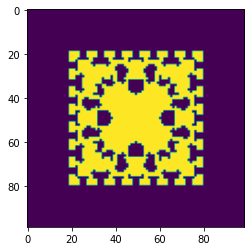

In [25]:
picture = np.zeros((row,column))
P = new_prison.copy()
picture[P=='C'] =33
picture[P=='D'] = 255
pyplot.imshow(picture)
pyplot.imsave('prisoner.png',picture)

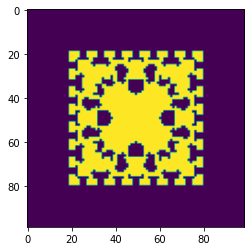

In [26]:
%run prisoner2.py